In [4]:
import cv2
import os
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [34]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()#train = 60.000, test = 10.000 Datensätze



In [35]:
#Normalisierung der Pixel
x_train = x_train / 255.0
x_test = x_test / 255.0



In [54]:
#Beispiele, für Normalisierung erstellt
"""
img = cv2.imread("5.png")[:,:,0]
img = np.invert(np.array([img]))


dataframe1 = pd.DataFrame(img[0])
dataframe1.to_csv("nicht-normalisiert.csv")



img = img / 255.0
plt.figure(figsize=(28,28)) 
sn.heatmap(img[0], annot= True, cmap="binary")


dataframe2 = pd.DataFrame(img[0])
dataframe2.to_csv("normalisiert.csv")
"""

'\nimg = cv2.imread("5.png")[:,:,0]\nimg = np.invert(np.array([img]))\n\n\ndataframe1 = pd.DataFrame(img[0])\ndataframe1.to_csv("nicht-normalisiert.csv")\n\n\n\nimg = img / 255.0\nplt.figure(figsize=(28,28)) \nsn.heatmap(img[0], annot= True, cmap="binary")\n\n\ndataframe2 = pd.DataFrame(img[0])\ndataframe2.to_csv("normalisiert.csv")\n'

In [37]:

model = tf.keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # 32 filters, 3,3 = Kernel Size zeigt die größe des Filters
model.add(MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))# - Zahlen auf 0 setzen
model.add(tf.keras.layers.Dense(128, activation='relu')) # Rectified Linear Unit activation function.
model.add(tf.keras.layers.Dense(128, activation='relu'))# 128 Neuronen, zwei Neuronen Layer, bei 3 war es schlechter, bei 1 auch schlechter. Accuracy mit 3 Layern = 0.9965
model.add(tf.keras.layers.Dense(10, activation='softmax')) #alle zusammen = 1 jedes neuron hat eine Zahl zwischen 0 und 1, Softmax = Winner takes ist all
#andere sind = argmax gibt den Index an, der den größten Wert besitzt
#max gibt den größten Wert zurück

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics =['accuracy'])
#
model.fit(x_train, y_train, epochs= 9) # 9 Epochen, bei 10 Epochen war eine schelchtere Accuracy, bis 9 ist die Accuracy besser geworden und die Loss weniger
model.save('handwritten.model')



Epoch 1/9
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1481 - accuracy: 0.9542
Epoch 2/9
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0507 - accuracy: 0.9837
Epoch 3/9
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0312 - accuracy: 0.9895
Epoch 4/9
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0213 - accuracy: 0.9927
Epoch 5/9
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0151 - accuracy: 0.9951
Epoch 6/9
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0119 - accuracy: 0.9959
Epoch 7/9
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 8/9
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0091 - accuracy: 0.9971
Epoch 9/9
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0065 - accuracy: 0.9979


INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [13]:
#Durchführen, falls das Model nicht erneuet trainiert werden soll, Lädt das bereits trainierte Modell neu ein
#model = tf.keras.models.load_model('handwritten.model') # Laden des Models
#loss, accuracy = model.evaluate(x_test, y_test)

In [109]:
#Erzeugen der Funktion, damit eine PNG mit 28x28 Größe die Zahl predicted werden kann.
def predicthandwritten(path): 
 img = cv2.imread(path)[:,:,0]#Einlesen, da sonst Dimensionen bei der Prediction einen Fehler werfen
 img = np.invert(np.array([img]))
 prediction = model.predict(img)
 print("Neuronen Aktivierung: ", prediction[0])
 plt.imshow(img[0])
 plt.show()
 print("Die Vorhersage lautet: " , np.argmax(prediction))#np.argmax zeigt die Index stelle des Arrays an, die auch in dem Neuronen Array aktiviert ist
 



313/313 [==============================] - 1s 3ms/step
9


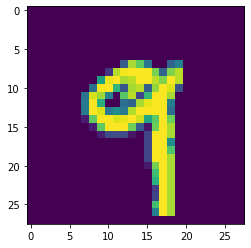

In [39]:
#Bild 322 des x_test predicten
predictions = model.predict(x_test)
print(np.argmax(predictions[322]))
plt.imshow(x_test[322])
plt.show()


1/1 [==============================] - 0s 14ms/step
Neuronen Aktivierung:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


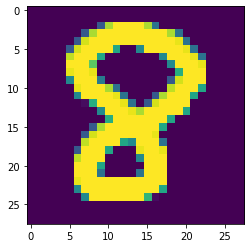

Die Vorhersage lautet:  8


In [110]:
#Bild mit dem Namen 7.png vorhersagen
predicthandwritten("8.png")

Text(69.0, 0.5, 'Tatsächlicher Wert')

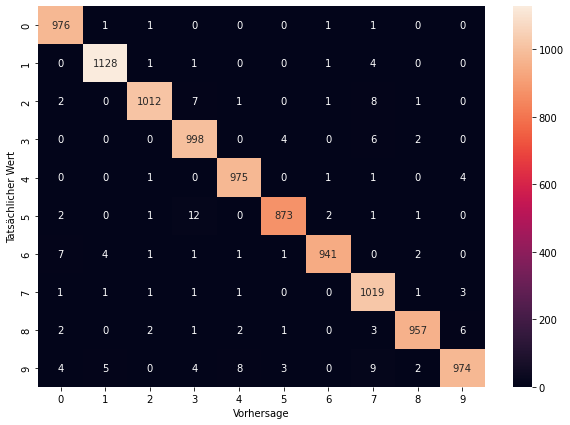

In [8]:
#Confusionsmatrix erstellen über den x_test Datensatz
prediction_labels = [np.argmax(i) for i in predictions]

confusionmatrix = tf.math.confusion_matrix(labels=y_test, predictions=prediction_labels)

plt.figure(figsize = (10, 7))
sn.heatmap(confusionmatrix, annot=True, fmt='d')
plt.xlabel('Vorhersage')
plt.ylabel('Tatsächlicher Wert')